In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import numpy as np
import seaborn as sn


In [6]:
# Load data from NPZ file in your local library
data = np.load('/Users/neevgrover/Documents/Python Programs/Digit Recognition/Data.npz')

# Access the variables stored in the NPZ file
X_train = data['x_train']
y_train = data['y_train']
X_test = data['x_test']
y_test = data['y_test']

# Optionally, you can check the keys of the loaded data
print("Keys in the NPZ file:", data.files)

# Close the NPZ file
data.close()

Keys in the NPZ file: ['x_test', 'x_train', 'y_train', 'y_test']


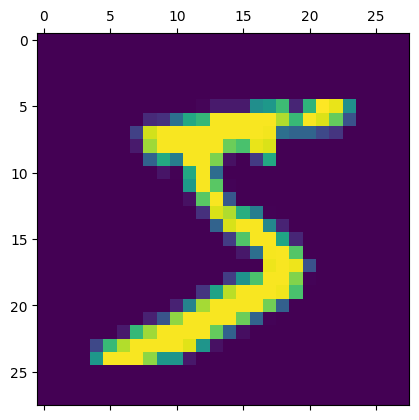

In [7]:
plt.matshow(X_train[0])

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

In [11]:
X_test_flattened.shape

(10000, 784)

In [12]:
len(X_train)

60000

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Model without any hidden layers
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 622us/step - loss: 0.4664 - accuracy: 0.8792
Epoch 2/5
1875/1875 [==============================] - 1s 499us/step - loss: 0.3036 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 1s 520us/step - loss: 0.2832 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 1s 448us/step - loss: 0.2731 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 1s 428us/step - loss: 0.2665 - accuracy: 0.9259


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 422us/step - loss: 0.2724 - accuracy: 0.9237


[0.27243709564208984, 0.9236999750137329]

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 346us/step


array([2.2134453e-02, 4.8360084e-07, 5.4137144e-02, 9.4556594e-01,
       2.4323321e-03, 1.3684489e-01, 2.1820679e-06, 9.9985647e-01,
       1.0530114e-01, 7.2037286e-01], dtype=float32)

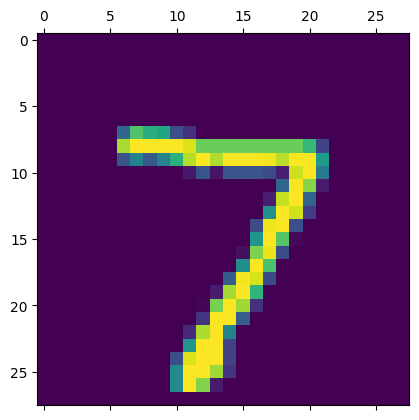

In [16]:
plt.matshow(X_test[0])

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    1,    0,    6,    7,    4,    1,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,   12,  921,   16,   10,    6,   12,   14,   32,    3],
       [   1,    0,   16,  898,    0,   53,    2,   15,   17,    8],
       [   1,    1,    4,    1,  919,    0,    9,    5,    9,   33],
       [   7,    2,    2,   14,   10,  811,   13,    6,   21,    6],
       [   8,    3,    5,    1,    8,   21,  907,    2,    3,    0],
       [   1,    5,   22,    4,    6,    0,    0,  964,    2,   24],
       [   7,   10,    7,   17,   10,   51,    8,   13,  838,   13],
       [  11,    7,    1,    7,   33,    9,    0,   30,    3,  908]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

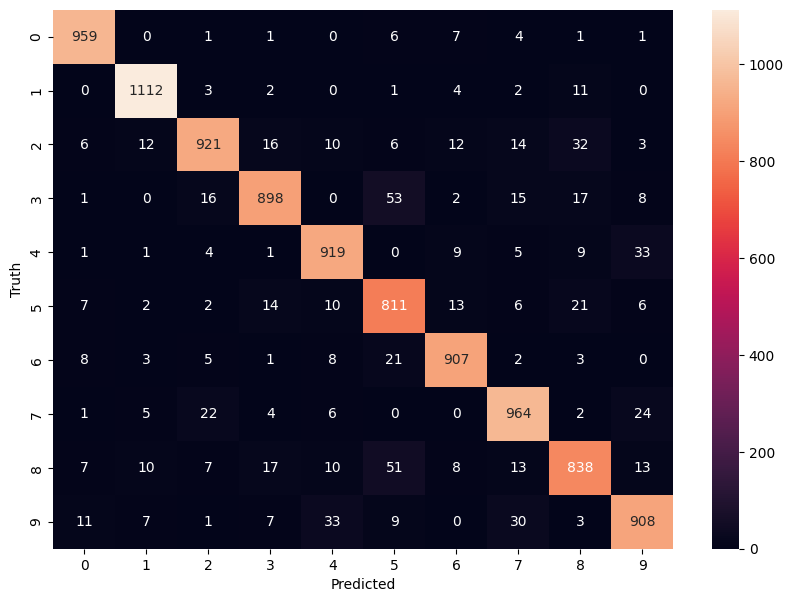

In [19]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2657 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 1s 721us/step - loss: 0.1207 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 1s 792us/step - loss: 0.0850 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 2s 836us/step - loss: 0.0646 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 2s 850us/step - loss: 0.0499 - accuracy: 0.9845


In [21]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 488us/step - loss: 0.0882 - accuracy: 0.9752


[0.08824768662452698, 0.9751999974250793]

313/313 [==============================] - 0s 621us/step


Text(95.72222222222221, 0.5, 'Truth')

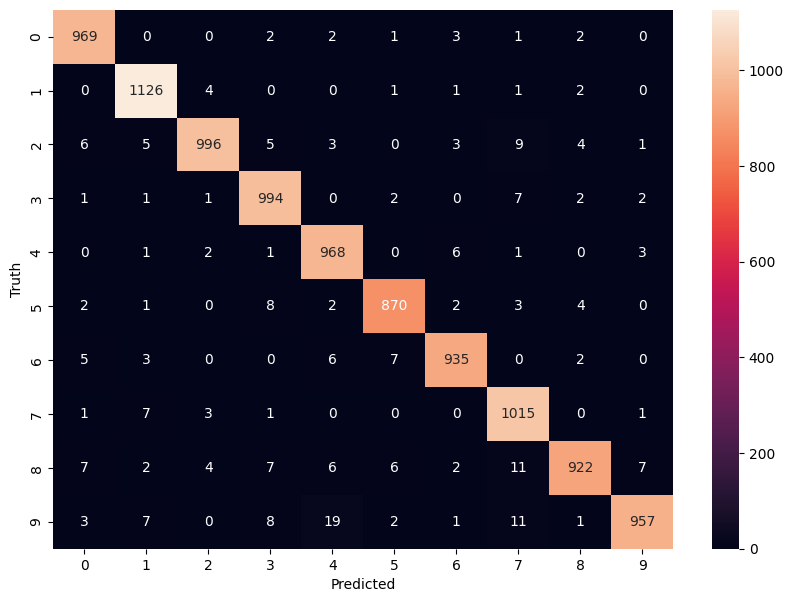

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 956us/step - loss: 0.2682 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1215 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 1s 722us/step - loss: 0.0862 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 2s 801us/step - loss: 0.0656 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 1s 731us/step - loss: 0.0522 - accuracy: 0.9838


In [24]:
model.save("/Users/neevgrover/Documents/Python Programs/Digit Recognition/model.h5")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 451us/step - loss: 0.0759 - accuracy: 0.9754


[0.07590431720018387, 0.9753999710083008]

In [30]:
#Barrier between the two codes

In [26]:

image_path = "/Users/neevgrover/Documents/Python Programs/Digit Recognition/resized_pic.jpg"
image = cv2.imread(image_path)

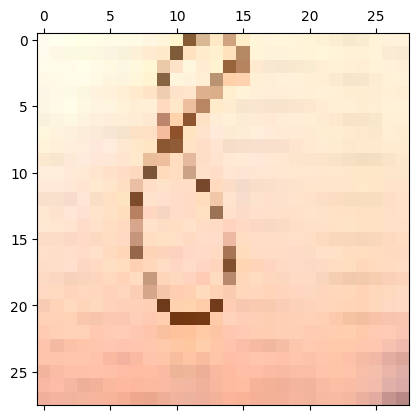

In [29]:
plt.matshow(image)

In [ ]:
#Capture the Image
"""
#Take picture

import cv2
import numpy

def capture_and_save_image():
    # Open the webcam (usually the default webcam is indexed as 0)
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Unable to open webcam")
        return

    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print("Error: Unable to capture frame")
        return

    # Save the captured frame as an image file
    cv2.imwrite('captured_image.jpg', frame)
    print("Image saved as 'captured_image.jpg'")

    # Release the webcam
    cap.release()

if __name__ == "__main__":
    capture_and_save_image()
"""

'\n#Take picture\nimport cv2\n\ndef capture_and_save_image():\n    # Open the webcam (usually the default webcam is indexed as 0)\n    cap = cv2.VideoCapture(0)\n\n    if not cap.isOpened():\n        print("Error: Unable to open webcam")\n        return\n\n    # Capture frame-by-frame\n    ret, frame = cap.read()\n\n    if not ret:\n        print("Error: Unable to capture frame")\n        return\n\n    # Save the captured frame as an image file\n    cv2.imwrite(\'captured_image.jpg\', frame)\n    print("Image saved as \'captured_image.jpg\'")\n\n    # Release the webcam\n    cap.release()\n\nif __name__ == "__main__":\n    capture_and_save_image()\n'

In [ ]:
#Resize the image
"""

import cv2
import numpy


def resize_image(image_path):
    # Load the image from disk
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image")
        return None
    
    # Resize the image to 28x28 pixels
    resized_image = cv2.resize(image, (28, 28))
    
    return resized_image

if __name__ == "__main__":
    # Path to the image you want to resize
    image_path = "/Users/neevgrover/Documents/Python Programs/Digit Recognition/8_large.jpg"
    
    # Resize the image
    resized_image = resize_image(image_path)
    if resized_image is not None:
        # Save the resized image to disk
        cv2.imwrite('/Users/neevgrover/Documents/Python Programs/Digit Recognition/resized_pic.jpg', resized_image)
        print("Resized image saved as 'resized_pic.jpg'")
"""

Resized image saved as 'resized_pic.jpg'
